# Here I'll be doing a qualitative test using nearest neighbors
- generate images with a trained model 
- find the nearest neighbor to that generated image in the training set 
- visually compare the generated image to its real image neighbor

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import pickle
from tensorflow.keras.layers import InputLayer, Dense, LSTM, Dropout, Activation, Conv2D, Flatten, Reshape, Conv2DTranspose, MaxPooling2D, BatchNormalization
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras import backend
from tensorflow.keras.initializers import RandomNormal
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.constraints import Constraint
import argparse

FONTSIZE=18
plt.rcParams['figure.figsize']=(16,8)
plt.rcParams['font.size']=FONTSIZE

# Generate Many Images

In [3]:
generator=load_model('./results_nonsquare3/ConvGan_fifths_gen_feature_64_disc_filters_64_64_Gstrides_12_2_Dstrides_2_2_G_epoch_150.h5')

In [6]:
def generate_latent_space(latent_dim,sample_size):
    '''
    latent_dim - size of the latent dimenstion
    sample_size - number of samples
    '''
    
    gen_input=np.random.randn(latent_dim*sample_size)
    gen_input=gen_input.reshape((sample_size,latent_dim))
    
    return gen_input

latent_space=generate_latent_space(latent_dim=10,sample_size=100)

In [7]:
generated_plots=generator.predict(latent_space)
print(generated_plots.shape)

(100, 96, 96, 4)


# find nearest neighbor in training set for each generated image

In [8]:
fp = open('ins_convgan_final_fantasy_fifths.pkl', "rb")
ins = pickle.load(fp)
fp.close()

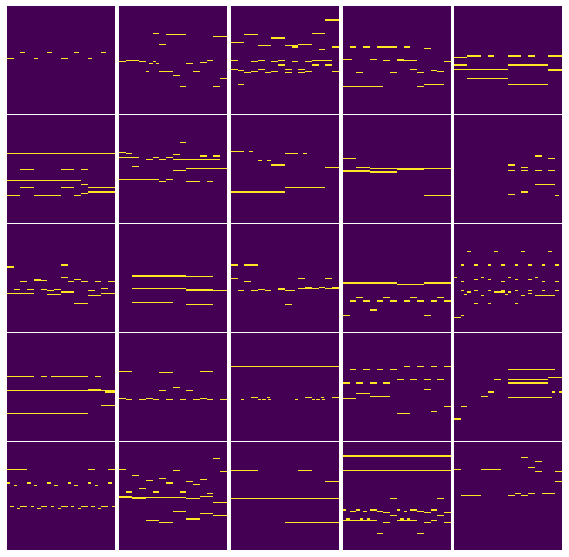

In [9]:
plt.rcParams['figure.figsize']=(10,10)

n=5

idx_all=np.arange(ins.shape[0])
idxs=np.random.choice(idx_all,n*n,replace=False)
fig,axs=plt.subplots(nrows=n,ncols=n)
count=-1
for i in range(n):
    for j in range(n):
        count+=1
        axs[i,j].imshow(ins[idxs[count],:,:,0].reshape((96,96)))
        axs[i,j].axis('off')
        
plt.subplots_adjust(wspace=0.01,hspace=0.01)

In [10]:
from sklearn.neighbors import NearestNeighbors
plt.rcParams['figure.figsize']=(16,8)

In [11]:
#only consider the first channel
generated_plots_cut=generated_plots[:,:,:,0]
ins_cut=ins[:,:,:,0]

print(generated_plots_cut.shape)
print(ins_cut.shape)

(100, 96, 96)
(3012, 96, 96)


In [12]:
#need to unravel the images to go from shape
#[n_samples,96,96] to 
#[s_samples,96*96]
#so it has the correct shape of [n_samples,n_features]

generated_X=generated_plots_cut.reshape((generated_plots_cut.shape[0],96*96))
ins_X=ins_cut.reshape((ins_cut.shape[0],96*96))

print(generated_X.shape)
print(ins_X.shape)

(100, 9216)
(3012, 9216)


In [13]:
#these are the indexes in ins that give the nearest neighbor to each generated image
#len(idxs)=generated_plots.shape[0]

neigh = NearestNeighbors(n_neighbors=1)

idxs=[]

for i in range(10):
    
    #define an X with the generated image in the 0th index and all of the training images following it
    # X shape = [ins.shape[0]+1,96*96]
    
    X=np.zeros((ins_X.shape[0]+1,96*96))
    X[0,:]=generated_X[i,:]
    X[1:,:]=ins_X
    neigh.fit(X,y=0)
    idx=neigh.kneighbors(return_distance=False)
    print(idx[0][0])
    idxs.append(idx[0][0])

751
751
751
751
751
751
751
751
751
751


In [14]:
print(idxs)

[751, 751, 751, 751, 751, 751, 751, 751, 751, 751]


# Plot generated image - nearest neighbor pairs

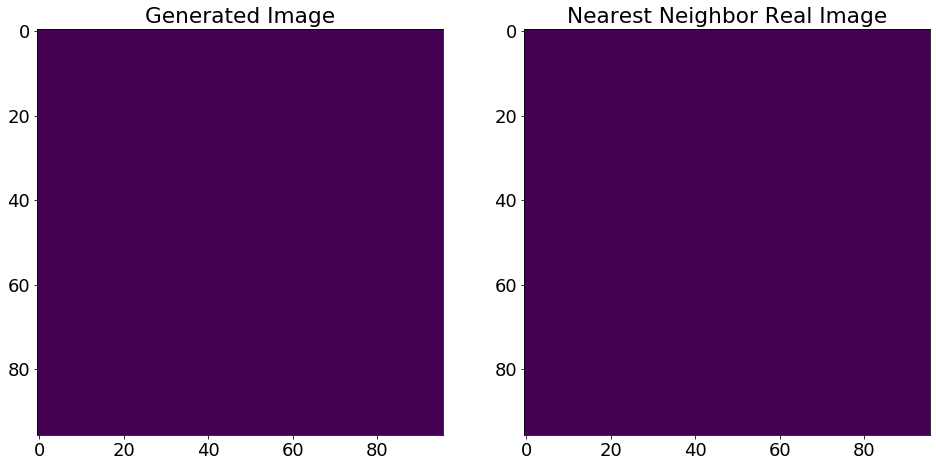

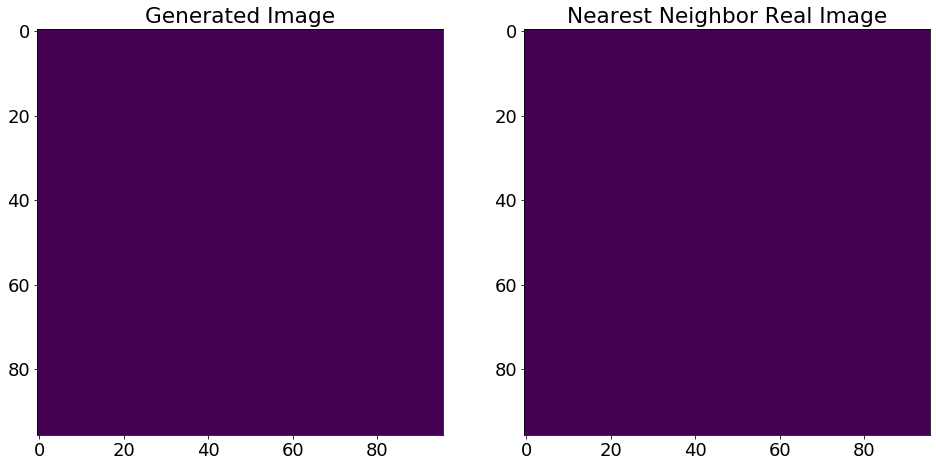

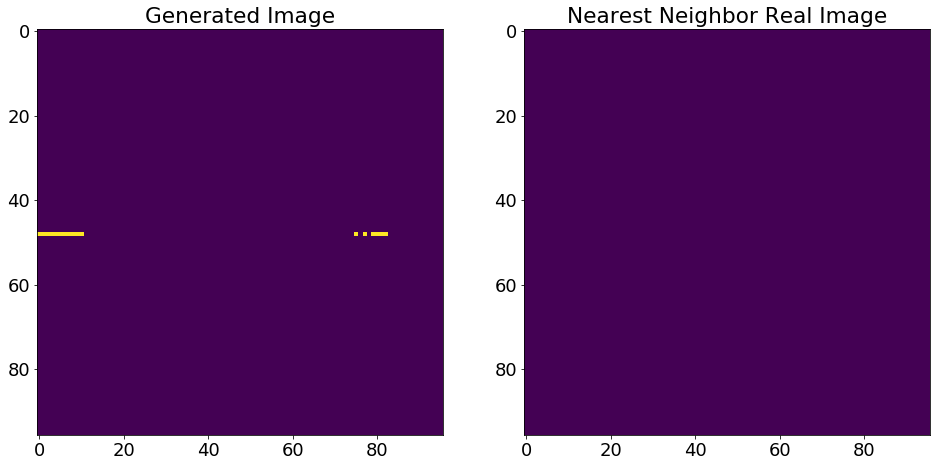

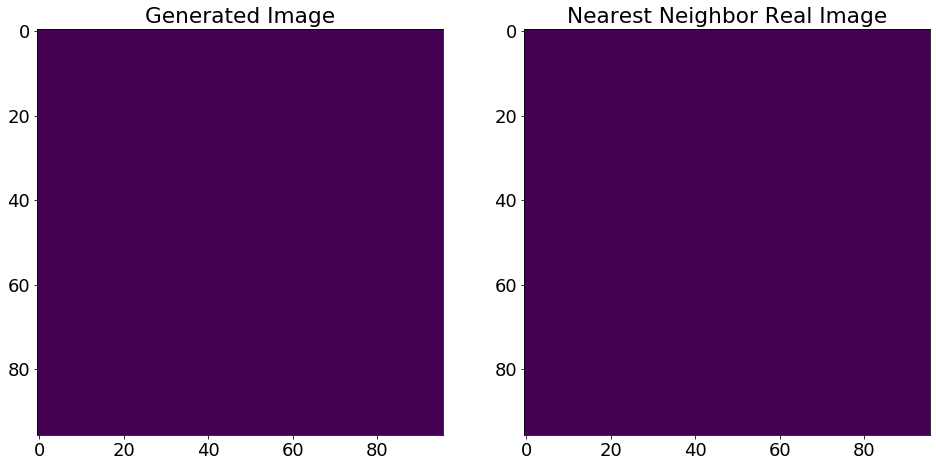

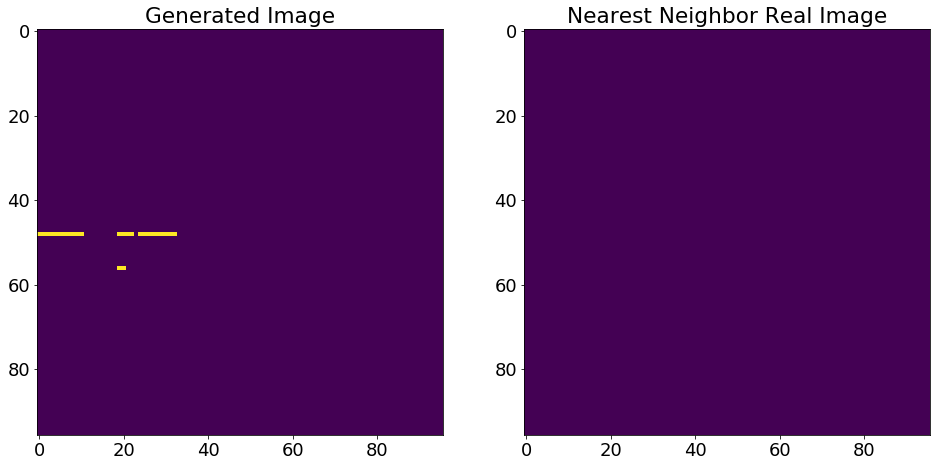

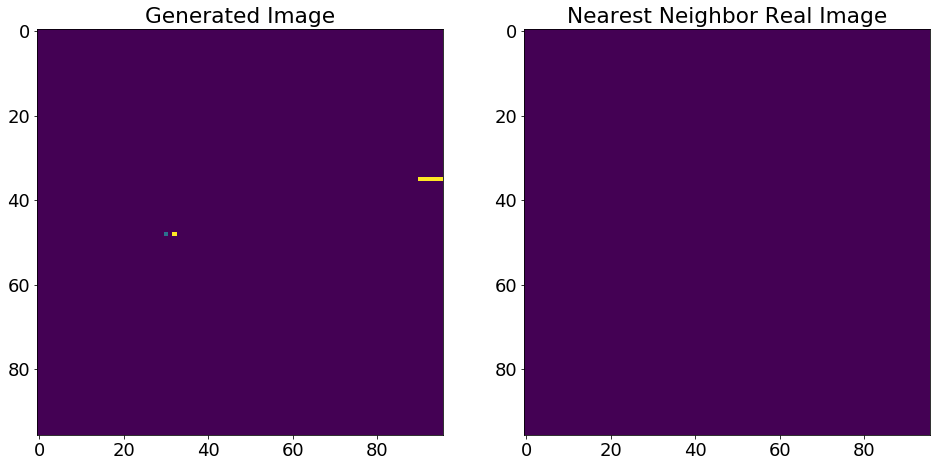

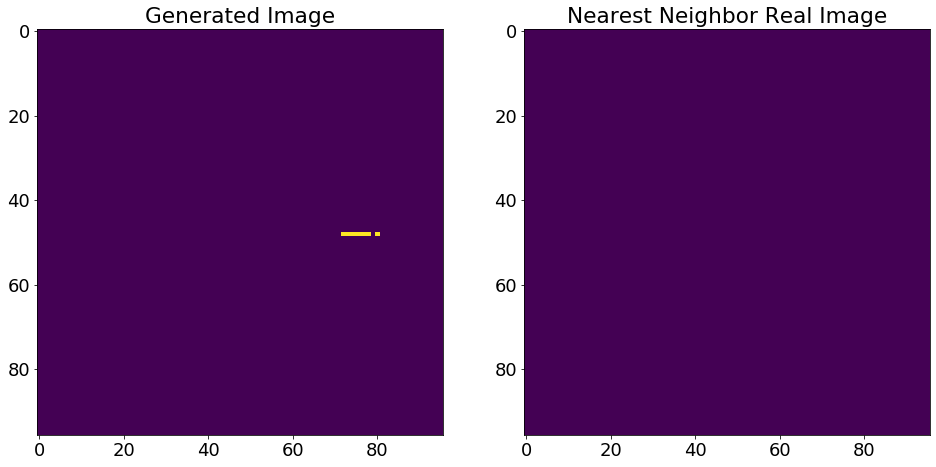

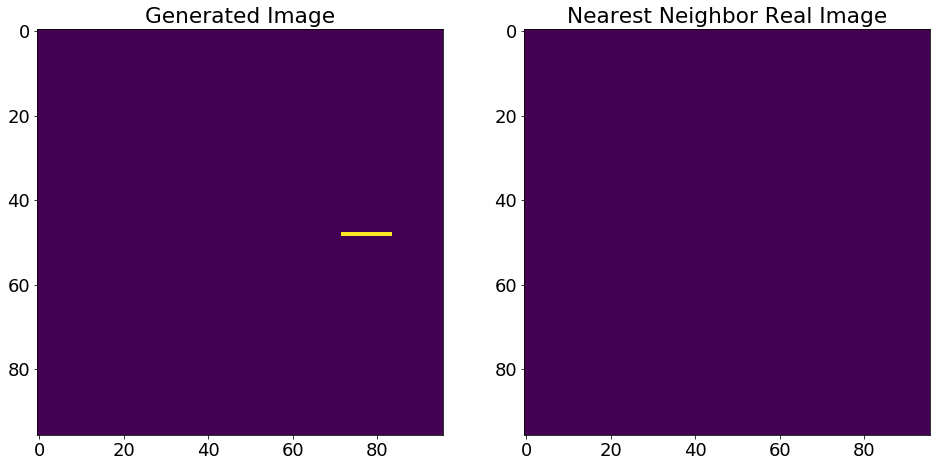

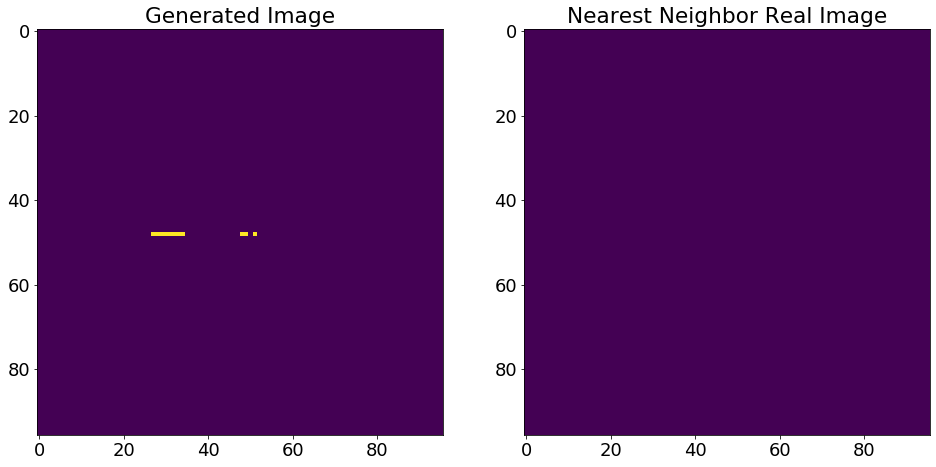

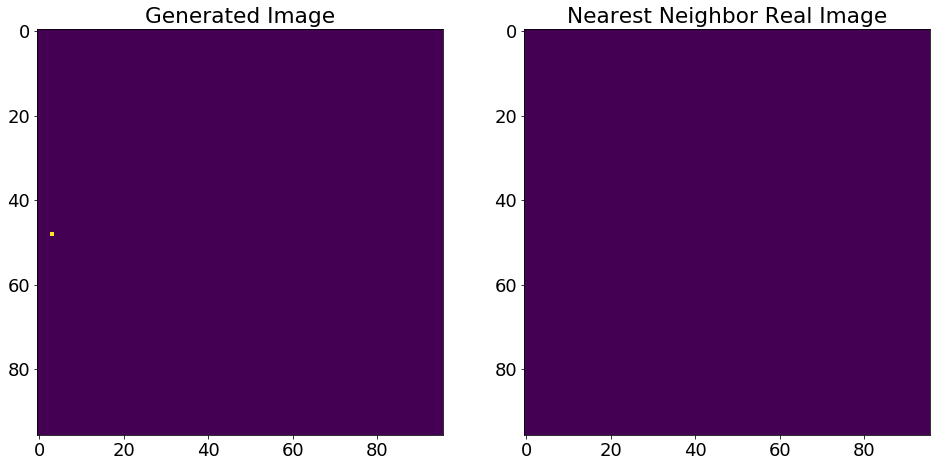

In [15]:
for i in range(10):
    fig,axs=plt.subplots(nrows=1,ncols=2)
    axs[0].imshow(generated_plots_cut[i,:,:])
    axs[0].set_title("Generated Image")
    
    idx=idxs[i]
    axs[1].imshow(ins_cut[idx,:,:])
    axs[1].set_title('Nearest Neighbor Real Image')
    plt.show()